<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK5/blob/main/UPASS_ML_WEEK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise

Features Engineering for Linear Regression Model

Reference:
https://www.kaggle.com/code/klmsathishkumar/shipping-cost-prediction/notebook

Training dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv

Testing dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/test.csv

We will use features engineering technique to improve the predicting performance of shipping cost from linear regression model.

The steps are:

1. Load Explore and Prepare Dataset
2. Feature Selection

*   Missing Values
*   Information Gain
*   Categorical Encoding
*   Feature Splitting
*   Handling Outliers
*   Variable Transformations
*   Scaling
*   Feature Creation in ML   
    
3. Modelling and Analyze the performance

##1. Load Explore and Prepare Dataset

**[1.1]** Import the pandas and numpy packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**[1.2]** Create a variable called file_url containing the link to the CSV file

In [ ]:
file_url = "https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv"

**[1.3]** Load the data into a DataFrame called df

In [ ]:
org_train = pd.read_csv(file_url, index_col=0)
df_train = pd.read_csv(file_url, index_col=0)

**[1.4]** Display the first 5 rows of df

In [ ]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


**[1.5]** Display the summary (info) of df

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, fffe3900350033003300 to fffe3700310031003600
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            6500 non-null   object 
 1   Artist Reputation      5750 non-null   float64
 2   Height                 6125 non-null   float64
 3   Width                  5916 non-null   float64
 4   Weight                 5913 non-null   float64
 5   Material               5736 non-null   object 
 6   Price Of Sculpture     6500 non-null   float64
 7   Base Shipping Price    6500 non-null   float64
 8   International          6500 non-null   object 
 9   Express Shipment       6500 non-null   object 
 10  Installation Included  6500 non-null   object 
 11  Transport              5108 non-null   object 
 12  Fragile                6500 non-null   object 
 13  Customer Information   6500 non-null   object 
 14  Remote Location        572

**[1.6]** Check null values

In [ ]:
df_train.isnull().sum()

Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [ ]:
# prompt: seperate categorical column and numerical

cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
num_cols = df_train.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns with missing values:")
print(df_train[cat_cols].columns[df_train[cat_cols].isnull().any()])

print("\nNumerical columns with missing values:")
print(df_train[num_cols].columns[df_train[num_cols].isnull().any()])

Categorical columns with missing values:
Index(['Material', 'Transport', 'Remote Location'], dtype='object')

Numerical columns with missing values:
Index(['Artist Reputation', 'Height', 'Width', 'Weight'], dtype='object')


#2. Features Selection
###Missing Values


In [ ]:
# prompt: check percentage of null value for each features

missing_pct = df_train.isnull().sum() * 100 / len(df_train)
print("Percentage of missing values in each column:")
print(missing_pct)


Percentage of missing values in each column:
Artist Name               0.000000
Artist Reputation        11.538462
Height                    5.769231
Width                     8.984615
Weight                    9.030769
Material                 11.753846
Price Of Sculpture        0.000000
Base Shipping Price       0.000000
International             0.000000
Express Shipment          0.000000
Installation Included     0.000000
Transport                21.415385
Fragile                   0.000000
Customer Information      0.000000
Remote Location          11.861538
Scheduled Date            0.000000
Delivery Date             0.000000
Customer Location         0.000000
Cost                      0.000000
dtype: float64


In [ ]:
for col in cat_cols:
  if col in df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].mode())

In [ ]:
for col in num_cols:
  if col in df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

##Information Gain

In [ ]:
# prompt: X_train[cat_cols] transform label encodeing concat to x_train drop X_train[cat_cols] columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
  if col in df_train.columns:
    df_train[col] = le.fit_transform(df_train[col])

In [ ]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,570,0.26,17.0,6.000000,4128.000000,1,13.91,16.27,1,1,0,0,0,1,0,768,749,3847,-283.29
fffe3800330031003900,2744,0.28,3.0,3.000000,61.000000,1,6.83,15.00,0,0,0,1,0,1,0,317,308,3842,-159.96
fffe3600370035003100,3662,0.07,8.0,5.000000,237.000000,3,4.96,21.18,0,0,0,1,1,1,1,328,321,524,-154.29
fffe350031003300,5155,0.12,9.0,9.617647,400694.821918,0,5.81,16.31,0,0,0,3,0,0,1,700,680,1566,-161.16
fffe3900320038003400,5325,0.15,17.0,6.000000,324.000000,0,3.18,11.94,1,1,1,0,0,1,0,1606,1597,404,-159.23


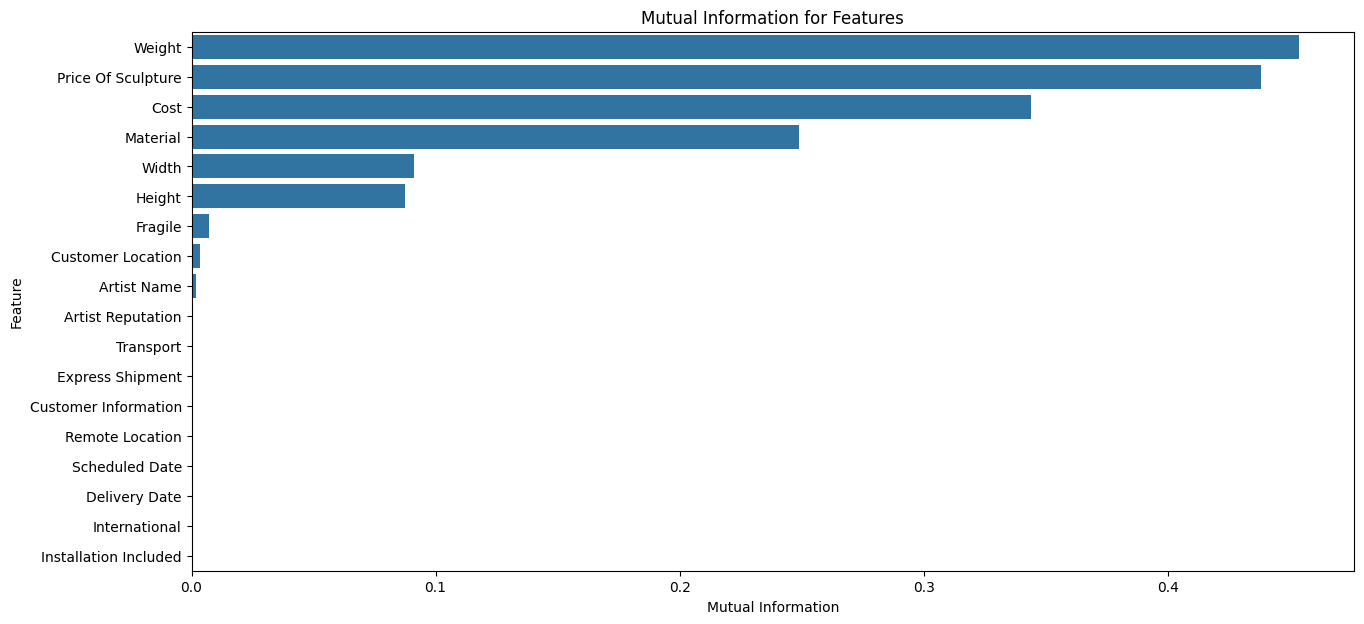

In [ ]:
# prompt: information gain for each feature and plot bar chart

from sklearn.feature_selection import mutual_info_regression

X_train = df_train.drop('Base Shipping Price', axis=1)
y_train = df_train['Base Shipping Price']

mutual_info = mutual_info_regression(X_train, y_train)

# Create a dataframe with the features and their corresponding mutual information scores
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info})

# Sort the dataframe by mutual information in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 7))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information for Features')
plt.show()


In [ ]:
mi_df

,Feature,Mutual Information
4,Weight,0.453638
6,Price Of Sculpture,0.438196
17,Cost,0.343784
5,Material,0.248953
3,Width,0.091243
2,Height,0.087636
11,Fragile,0.006989
16,Customer Location,0.003500
0,Artist Name,0.001782
1,Artist Reputation,0.000000


##**[2.1]** Immutation for 'Height', 'Width', 'Weight'

* Missing numerical variables are generally replaced by Mean or Median.



In [ ]:
# prompt: fill 'Height', 'Width', 'Weight' with mean

df_train['Height'] = df_train['Height'].fillna(df_train['Height'].mean())
df_train['Width'] = df_train['Width'].fillna(df_train['Width'].mean())
df_train['Weight'] = df_train['Weight'].fillna(df_train['Weight'].mean())


In [ ]:
# Placeholder for student's code
# Try fill 'Height', 'Width', 'Weight' with median

Missing categorical variables are generally replaced by Mode.

In [ ]:
# prompt: fill nan Material with mode

df_train['Material'].fillna(df_train['Material'].mode()[0], inplace=True)
df_train['Transport'].fillna(df_train['Transport'].mode()[0], inplace=True)
df_train['Remote Location'].fillna(df_train['Remote Location'].mode()[0], inplace=True)

In [ ]:
# check for null values

df_train.isnull().sum()

##**[2.2]** Discretization

* Discretization involves grouping data values into bins.


In [ ]:
df_train.head()

In [ ]:
df_train['Material'].unique()

In [ ]:
# prompt: create new column from 'Material' classify metal or non metal

df_train['Material_cat'] = np.where(df_train['Material'].str.contains('Metal'), 'Metal', 'Non-Metal')
df_train.head()


##**[2.3]** One-Hot Encoding

Beware OHE could dramatically increase the number of features and result in highly correlated features.

In [ ]:
# prompt: one-hot encoding for Material column

df_train = pd.get_dummies(df_train, columns=['Material'], prefix='Material_')


In [ ]:
pd.set_option('display.max_columns', None)
df_train.head()

##**[2.4]** Feature Splitting

In [ ]:
# prompt: df_train Scheduled Date and Delivery Date to datetime

df_train['Scheduled Date'] = pd.to_datetime(df_train['Scheduled Date'])
df_train['Delivery Date'] = pd.to_datetime(df_train['Delivery Date'])


In [ ]:
# prompt: split Scheduled Date to year month day columns seperate

df_train['Scheduled_Year'] = df_train['Scheduled Date'].dt.year
df_train['Scheduled_Month'] = df_train['Scheduled Date'].dt.month
df_train['Scheduled_Day'] = df_train['Scheduled Date'].dt.day


In [ ]:
pd.reset_option('all')
df_train.head()

##**[2.5]** Handling Outliers

Handline unusually high or low values in the dataset by Remove, Replace, or Capping the values

In [ ]:
org_train.describe()

In [ ]:
# prompt: plot bloxplot for all column in org_train

import seaborn as sns

# Calculate the number of rows and columns for subplots
num_rows = 2
num_columns = len(num_cols) // 2 + len(num_cols) % 2  # Ensure an even number of columns if len(num_cols) is odd

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5))

# Flatten the axes array if there is only one row
axes = axes.flatten()

# Iterate through numerical columns and create boxplots
for i, col in enumerate(num_cols):
    if i < len(axes):  # Check if there are more axes available
      sns.boxplot(x=org_train[col], ax=axes[i])
      axes[i].set_title(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [ ]:
org_train.describe()

In [ ]:
train_rm_out = org_train.copy()
train_rp_out = org_train.copy()
train_cp_out = org_train.copy()

In [ ]:
# prompt: dealing with outliner by remove replace capping

# Remove outliers
Q1 = train_rm_out['Height'].quantile(0.25)
Q3 = train_rm_out['Height'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_rm_out = train_rm_out[(train_rm_out['Height'] >= lower_bound) & (org_train['Height'] <= upper_bound)]

In [ ]:
# prompt: replace outliner in train_rp_out

# Replace outliers
Q1 = train_rp_out['Height'].quantile(0.25)
Q3 = train_rp_out['Height'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_rp_out['Height'] = np.where((train_rp_out['Height'] < lower_bound) | (train_rp_out['Height'] > upper_bound), train_rp_out['Height'].median(), train_rp_out['Height'])


In [ ]:
# Cap outliers
train_cp_out['Height'] = train_cp_out['Height'].clip(lower_bound, upper_bound)

**Comparing** the shape of the dataset after performing Remove, Replace, Capping methods on outliers

In [ ]:
train_rm_out.shape, train_rp_out.shape, train_cp_out.shape

In [ ]:
train_rm_out.describe()

In [ ]:
train_rp_out.describe()

In [ ]:
train_cp_out.describe()

##**[2.6]** Variable Transformations

In [ ]:
# prompt: plot df_train['Cost'] to show distribution

sns.distplot(df_train['Cost'])
plt.show()

In [ ]:
df_train['Log_Cost'] = df_train['Cost'].apply(lambda x : np.log1p(abs(x)))

In [ ]:
sns.distplot(df_train['Log_Cost'])
plt.show()

In [ ]:
# prompt: apply Quantile Transformer Scaler to df_train['Cost'] create a new column call 'Quan_Cost'

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
df_train['Quan_Cost'] = scaler.fit_transform(df_train['Cost'].values.reshape(-1, 1))


In [ ]:
sns.distplot(df_train['Quan_Cost'])
plt.show()

##**[2.7]** Scaling

In [ ]:
df_train.head()

#3. Train LinearRegression Model


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [ ]:
org_train.head()

In [ ]:
org_train.dropna(inplace=True)

In [ ]:
org_train.isnull().sum()

In [ ]:
num_cols = org_train.select_dtypes(exclude=['object']).columns.tolist()

print("\nNumerical columns:")
print(num_cols)

In [ ]:
# prompt: y=org_train Base Shipping Price, X = org_train[num_cols] except Base Shipping Price

y = org_train['Base Shipping Price']
X = org_train[num_cols]
X = X.drop('Base Shipping Price', axis=1)


In [ ]:
X.shape, y.shape

In [ ]:
# prompt: import Linear regression fit X, y prediction

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [ ]:
# prompt: print rmse mae

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

#3. Train LinearRegression Model on Features engineered dataset


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [ ]:
df_train.isnull().sum()

In [ ]:
num_cols_df = df_train.select_dtypes(exclude=['object']).columns.tolist()

print("\nNumerical columns: ")
print(num_cols_df)

In [ ]:
# prompt: y=org_train Base Shipping Price, X = org_train[num_cols] except Base Shipping Price

y2 = df_train['Base Shipping Price']
X2 = df_train[num_cols]
X2 = X2.drop('Base Shipping Price', axis=1)

In [ ]:
X2.shape, y2.shape

In [ ]:
# prompt: import Linear regression fit X, y prediction

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X2, y2)
y_pred2 = model.predict(X2)


**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [ ]:
# prompt: print rmse mae

rmse = mean_squared_error(y2, y_pred2, squared=False)
mae = mean_absolute_error(y2, y_pred2)

print("RMSE:", rmse)
print("MAE:", mae)

#4. Compare the performance metrics
Do new features improve the performance of the models? If not what went wrong and how do we fix this?

In [ ]:
org_train.info()

In [ ]:
df_train.info()